In [2]:
#@title
from IPython.core.display import display, HTML
display(HTML('<h3 style="text-align: center;font-weight: normal;">========  COVID-19 Statistics Analysis  ==========</h3><p style="text-align: left;font-weight: normal;"> <strong>- COVID-19 relations with Temperature, humidity and Life Expectancy. <br>- Some graphs with real life statistics on multiple US cities </strong> </p>'))

In [ ]:
#@title
!git clone https://github.com/fadimasoud/C3.Grand_challeng.git

In [ ]:
#@title
cd /content/C3.Grand_challeng

In [ ]:
#@title
!wget https://covidtracking.com/data/download/all-states-history.csv

In [ ]:
#@title
!unzip \*.zip  && rm *.zip

In [7]:
#@title
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, HTML
import time
import datetime
from matplotlib.ticker import PercentFormatter
from IPython.display import Javascript

<IPython.core.display.Javascript object>

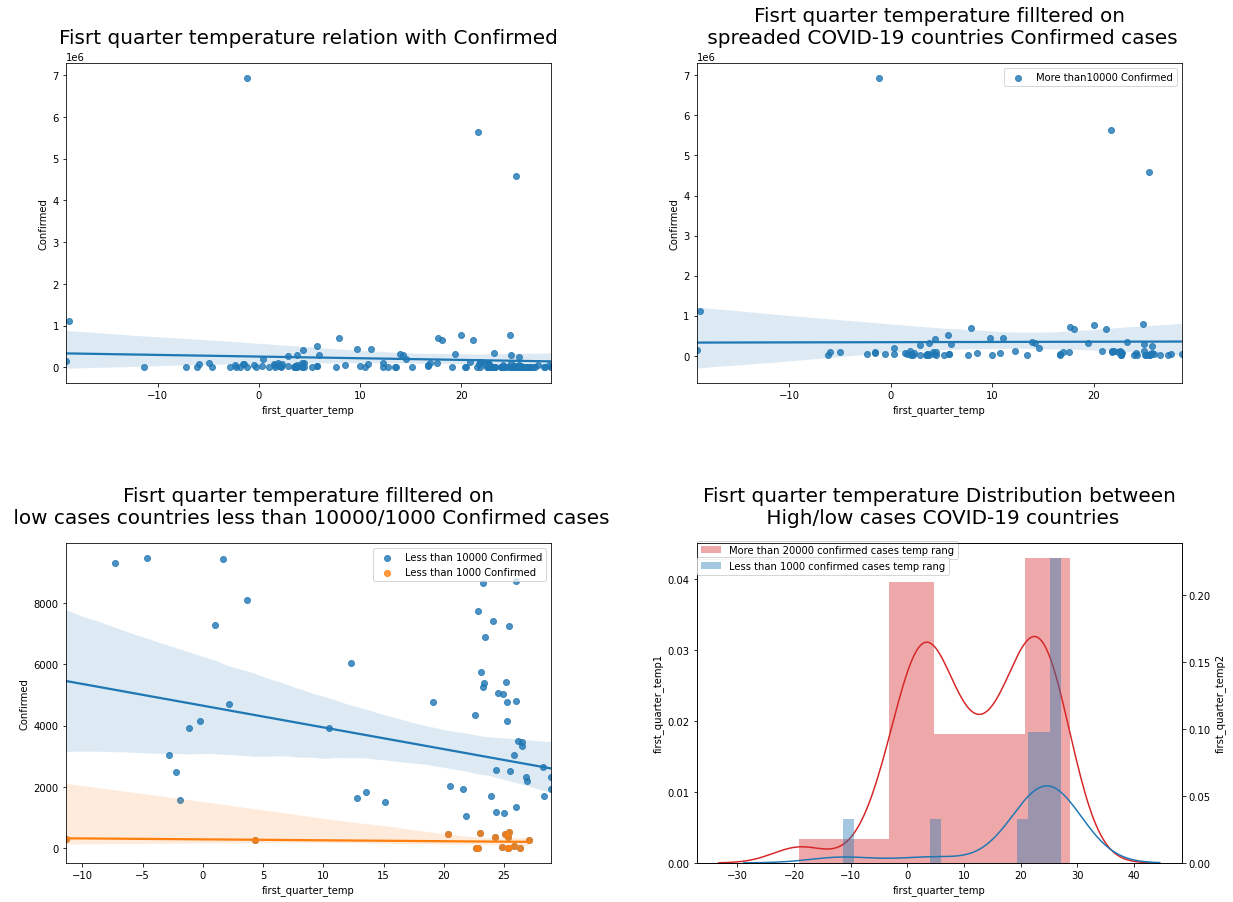

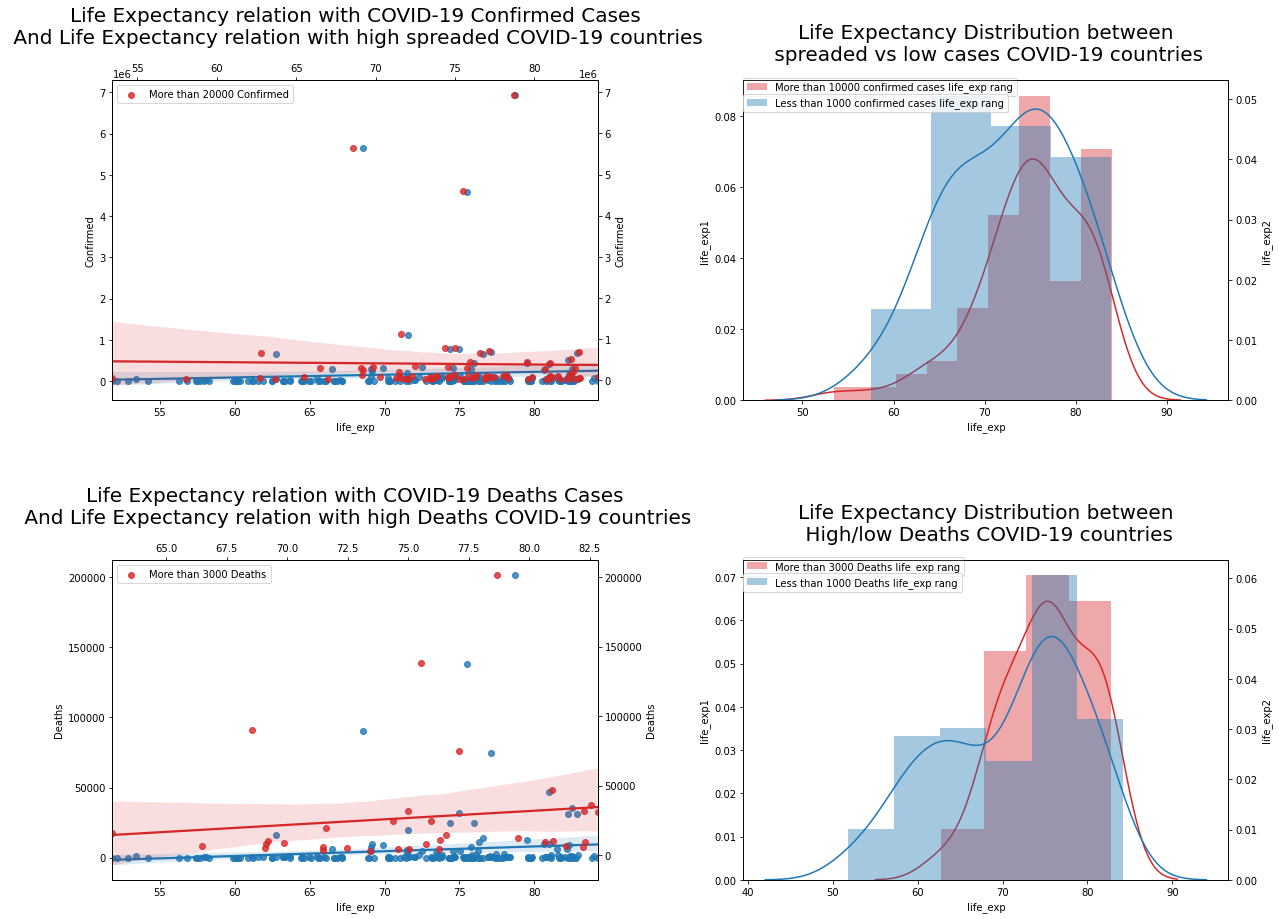

In [8]:
#@title

data_sum = pd.read_csv('/content/C3.Grand_challeng/covid_19_data.csv')
data_population = pd.read_csv('/content/C3.Grand_challeng/country_population.csv')
data_fertility = pd.read_csv('/content/C3.Grand_challeng/fertility_rate.csv')
data_life_exp = pd.read_csv('/content/C3.Grand_challeng/life_expectancy.csv')
data_temprature = pd.read_csv('/content/C3.Grand_challeng/temperature _monthly_data_per_country.csv')
data_curefews_dates = pd.read_csv('/content/C3.Grand_challeng/Curfews_and_lockdowns_countries_dates.csv')

# prepare data
#prepare covid_19_data.csv data table
#group data based on country and date
data_s = data_sum.groupby(['ObservationDate','Country/Region']).sum()
data_s=data_s.reset_index(['ObservationDate','Country/Region'])
#correct ObservationDate type and create new columns if needed 
data_s['ObservationDate'] = pd.to_datetime(data_s['ObservationDate'])
data_s['day'] = data_s['ObservationDate'].dt.day
data_s['month'] = data_s['ObservationDate'].dt.month
data_s['Active']=data_s['Confirmed']-(data_s['Deaths']+data_s['Recovered'])
data_s['R+D']=data_s['Recovered']+data_s['Deaths']
#create a new table grouped by counties with final comulative cases 
data_c_p = data_s.groupby('Country/Region').max().reset_index(['Country/Region'])
# print('COVID-19_data.csv after preparing info:\n')
# data_s.info()
#connect covid-19 data_c_p data with added column to population statistics
data_c_p['Country/Region'][data_c_p['Country/Region']=='Mainland China']='China'
data_c_p['Country/Region'][data_c_p['Country/Region']=="US"]="United States"
data_c_p['Country/Region'][data_c_p['Country/Region']=="UK"]="United Kingdom"
data_c_p['Country/Region'][data_c_p['Country/Region']=='Azerbaijan']='Azerbaijan'
data_c_p['Country/Region'][data_c_p['Country/Region']=="Hong Kong"]="Hong Kong SAR, China"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Iran"]="Iran, Islamic Rep."
data_c_p['Country/Region'][data_c_p['Country/Region']=="Macau"]="Macao SAR, China"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Russia"]="Russian Federation"
data_c_p['Country/Region'][data_c_p['Country/Region']=="South Korea"]="Korea, Rep."
data_c_p['Country/Region'][data_c_p['Country/Region']=="Syria"]="Syrian Arab Republic"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Venezuela"]="Venezuela, RB"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Yemen"]="Yemen, Rep."
data_c_p['Country/Region'][data_c_p['Country/Region']=="Slovakia"]="Slovak Republic"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Saint Lucia"]="St. Lucia"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Saint Vincent and the Grenadines"]="St. Vincent and the Grenadines"
data_c_p['Country/Region'][data_c_p['Country/Region']=="North Macedonia"]="Macedonia, FYR"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Republic of the Congo"]="Congo, Rep."
data_c_p['Country/Region'][data_c_p['Country/Region']=="('St. Martin',)"]='St. Martin (French part)'
data_c_p['Country/Region'][data_c_p['Country/Region']=="Egypt"]='Egypt, Arab Rep.'

data_p = data_population[['Country Name','2016']].copy()
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_p['Country Name'].loc[data_p['Country Name']==x].values:
        y.append(data_p['2016'].loc[data_p['Country Name']==x].values[0])
    else:
        y.append(0)
data_c_p['population'] = y
data_c_p['population'].fillna(0,inplace=True)

#connect covid-19 data_c_p data with added column to fertility statistics
data_f = data_fertility[['Country Name','2016']].copy()
data_f['2016'].fillna(0,inplace=True)
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_f['Country Name'].loc[data_f['Country Name']==x].values:
        y.append(data_f['2016'].loc[data_f['Country Name']==x].values[0])
    else:
        y.append(0)
data_c_p['fertility_rate'] = y
data_c_p['fertility_rate'].fillna(0,inplace=True)

#connect covid-19 data_c_p data with added column to life_exp statistics
data_l = data_life_exp[['Country Name','2016']].copy()
data_l['2016'].fillna(0,inplace=True)
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_l['Country Name'].loc[data_l['Country Name']==x].values:
        y.append(data_l['2016'].loc[data_l['Country Name']==x].values[0])
    else:
        y.append(0)
data_c_p['life_exp'] = y

#connect covid-19 data_c_p data with added column to first quarter mean tempreture statistics
#choose only first 4 months data from temperature _monthly_data_per_country.csv to calculate the mean
data_t = data_temprature[['Jan_Temp', 'Feb_temp', 'Mar_temp', 'Apr_Temp']].transpose(copy=True)
y=[]
for x in data_t.columns:
    y.append(data_t[x].mean())
    
#create new DataFrame to save country with its mean first quarter tempreture
data_te = pd.DataFrame()    
data_te['Country Name'] = data_temprature['ISO_3DIGIT']
data_te['first_quarter_temp']=y

#convert country code to name
y=[]
for i,x in enumerate(data_te['Country Name']):
    if x == data_population['Country Code'].loc[data_population['Country Code']==x].values:
        y.append(data_population['Country Name'].loc[data_population['Country Code']==x].values[0])
    else:
        y.append(0)
data_te['Country Name'] = y

#connect covid-19 data_c_p data with added column to first quarter mean tempreture statistics
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_te['Country Name'].loc[data_te['Country Name']==x].values:
        y.append(data_te['first_quarter_temp'].loc[data_te['Country Name']==x].values[0])
    else:
        y.append(0)
data_c_p['first_quarter_temp'] = y

#add Curefews and Lockdown Start dates columns
data_curefew = data_curefews_dates[['Countries and territories','Start date']]
data_curefew.columns=['Countries', 'Start date']
data_curefew.dropna(inplace=True)
data_curefew.drop_duplicates(inplace=True)
data_curefew['Countries'][data_curefew['Countries']=='Russia']='Russian Federation'
data_curefew['Countries'][data_curefew['Countries']=='Venezuela']='Venezuela, RB'
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_curefew['Countries'].loc[data_curefew['Countries']==x].values:
        y.append(data_curefew['Start date'].loc[data_curefew['Countries']==x].values[0])
    else:
        y.append('NAT')
data_c_p['Curefew_date'] = y
data_c_p['Curefew_date'] = pd.to_datetime(data_c_p['Curefew_date'])
for i, x in enumerate(data_c_p['Curefew_date'].tolist()):
    if x.month > 4:
        data_c_p['Curefew_date'].loc[i]=pd.to_datetime('%s%s%s'%(x.year, x.day, x.month), format='%Y%m%d')
data_c_p['Curefew_date'].fillna(0,inplace=True)

# print("COVID-19_data.csv groupby('Country/Region') and connect with life_exp, first quarter mean temperature, and population statistics, plus to Curfews and Lock-down Start dates:\n")
# data_c_p.info()


display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
plt.figure(figsize=(20,50))
plt.subplots_adjust(hspace = 0.5,wspace=0.3)
plt.subplot(6, 2, 1)
display(HTML('<h3 style="text-align: center;font-weight: normal;">========<strong> COVID-19</strong> Shows <strong>Strong spread</strong> relation with <strong>Temperature </strong>==========</h3><p style="text-align: center;font-weight: normal;">1- <strong>Less than 10 Celsius degree</strong> Temperature Average(1st-year-quarter(1st-4-months)) for all <strong>High COVID-19 spread</strong> Countries (more than 20000 cases) - one irregular value in Brazil were no Curfew or social distances procedures applied  <br><br>2- <strong>More than 18 Celsius degree</strong> Temperature Average(1st-year-quarter(1st-4-months)) for <strong>85% of countries with low COVID-19 spread</strong> (less than 1000 confirmed cases)<br> <br> </p>'))
sns.regplot(x='first_quarter_temp', y='Confirmed', data=data_c_p[(data_c_p['first_quarter_temp']!=0)], fit_reg=True)
plt.title('Fisrt quarter temperature relation with Confirmed', fontsize=20,pad=20)
plt.subplot(6, 2, 2)
sns.regplot(x='first_quarter_temp', y='Confirmed', data=data_c_p[(data_c_p['first_quarter_temp']!=0)&(data_c_p['Confirmed']>10000)&(data_c_p['Confirmed']!=0)], fit_reg=True,label='More than10000 Confirmed')
plt.title('Fisrt quarter temperature filltered on\n spreaded COVID-19 countries Confirmed cases', fontsize=20,pad=20)
plt.legend()
plt.subplot(6, 2, 3)
sns.regplot(x='first_quarter_temp', y='Confirmed', data=data_c_p[(data_c_p['first_quarter_temp']!=0)&(data_c_p['Confirmed']<10000)&(data_c_p['Confirmed']!=0)], fit_reg=True,label='Less than 10000 Confirmed')
sns.regplot(x='first_quarter_temp', y='Confirmed', data=data_c_p[(data_c_p['first_quarter_temp']!=0)&(data_c_p['Confirmed']<1000)&(data_c_p['Confirmed']!=0)], fit_reg=True,label='Less than 1000 Confirmed')
plt.title('Fisrt quarter temperature filltered on\n low cases countries less than 10000/1000 Confirmed cases', fontsize=20,pad=20)
plt.legend()
plt.subplot(6, 2, 4)
sns.distplot(data_c_p['first_quarter_temp'][(data_c_p['first_quarter_temp']!=0)&(data_c_p['Confirmed']>20000)&(data_c_p['Confirmed']!=0)],label='More than 20000 confirmed cases temp rang',color='tab:red',kde=True)
plt.ylabel('first_quarter_temp1')
plt.legend(loc=(0,0.95))
plt.twinx()
sns.distplot(data_c_p['first_quarter_temp'][(data_c_p['first_quarter_temp']!=0)&(data_c_p['Confirmed']<1000)&(data_c_p['Confirmed']!=0)],label='Less than 1000 confirmed cases temp rang',kde=True)
plt.title('Fisrt quarter temperature Distribution between\n High/low cases COVID-19 countries', fontsize=20,pad=20)
plt.ylabel('first_quarter_temp2')
plt.legend(loc=(0,0.9))
plt.show()
plt.figure(figsize=(20,50))
plt.subplots_adjust(hspace = 0.5,wspace=0.3)
plt.subplot(6, 2, 5)
display(HTML('<h3 style="text-align: center;font-weight: normal;"><br><br></h3>'))
display(HTML('<h3 style="text-align: center;font-weight: normal;">========<strong> COVID-19 </strong>Shows <strong>Strong spread/Deaths</strong> relation with <strong>Life Expectancy</strong> in Country </strong>==========</h3><p style="text-align: center;font-weight: normal;">1- All Countries with <strong>more than 3000 Deaths and High COVID-19 spread</strong> (more than 20000 cases) has <strong>76 and more years</strong> of Life Expectancy  <br><br>2- Countries with <strong>low Deaths(less than 3000) and low COVID-19 spread</strong> (less than 20000 cases) has <strong>75 and less years</strong> of Life Expectancy <br> <br></p>'))
sns.regplot(x='life_exp', y='Confirmed', data=data_c_p[(data_c_p['life_exp']!=0)], fit_reg=True)
plt.title('Life Expectancy relation with COVID-19 Confirmed Cases\n And Life Expectancy relation with high spreaded COVID-19 countries', fontsize=20,pad=20)
plt.twiny()
plt.twinx()
sns.regplot(x='life_exp', y='Confirmed', data=data_c_p[(data_c_p['life_exp']!=0)&(data_c_p['Confirmed']>20000)&(data_c_p['Confirmed']!=0)], fit_reg=True,label='More than 20000 Confirmed',color='tab:red')
plt.legend()
plt.subplot(6, 2, 6)
sns.distplot(data_c_p['life_exp'][(data_c_p['life_exp']!=0)&(data_c_p['Confirmed']>20000)&(data_c_p['Confirmed']!=0)],label='More than 10000 confirmed cases life_exp rang',color='tab:red',kde=True)
plt.ylabel('life_exp1')
plt.legend(loc=(0,0.95))
plt.twinx()
sns.distplot(data_c_p['life_exp'][(data_c_p['life_exp']!=0)&(data_c_p['Confirmed']<1000)&(data_c_p['Confirmed']!=0)],label='Less than 1000 confirmed cases life_exp rang',kde=True)
plt.title('Life Expectancy Distribution between\n spreaded vs low cases COVID-19 countries', fontsize=20,pad=20)
plt.ylabel('life_exp2')
plt.legend(loc=(0,0.9))
plt.subplot(6, 2, 7)
sns.regplot(x='life_exp', y='Deaths', data=data_c_p[(data_c_p['life_exp']!=0)], fit_reg=True)
plt.title('Life Expectancy relation with COVID-19 Deaths Cases\n And Life Expectancy relation with high Deaths COVID-19 countries', fontsize=20,pad=20)
plt.twiny()
plt.twinx()
sns.regplot(x='life_exp', y='Deaths', data=data_c_p[(data_c_p['life_exp']!=0)&(data_c_p['Deaths']>3000)&(data_c_p['Deaths']!=0)], fit_reg=True,label='More than 3000 Deaths',color='tab:red')
plt.legend()
plt.subplot(6, 2, 8)
sns.distplot(data_c_p['life_exp'][(data_c_p['life_exp']!=0)&(data_c_p['Deaths']>3000)&(data_c_p['Deaths']!=0)],label='More than 3000 Deaths life_exp rang',color='tab:red',kde=True)
plt.ylabel('life_exp1')
plt.legend(loc=(0,0.95))
plt.twinx()
sns.distplot(data_c_p['life_exp'][(data_c_p['life_exp']!=0)&(data_c_p['Deaths']<1000)&(data_c_p['Deaths']!=0)],label='Less than 1000 Deaths life_exp rang',kde=True)
plt.ylabel('life_exp2')
plt.legend(loc=(0,0.9))
plt.title('Life Expectancy Distribution between\n High/low Deaths COVID-19 countries', fontsize=20,pad=20)
plt.show()

In [9]:
#@title
df = pd.read_csv('/content/C3.Grand_challeng/all-states-history.csv')
df.fillna(0, inplace=True)
df['date'] = pd.to_datetime(df['date'])
# create new column for daily Increase Positive Cases Percenatage Per Total daily increase in Total Tests Result (%*100)
df['positiveIncreasePerTestIncrease']=((df['positiveIncrease']+1)/(df['totalTestResultsIncrease']+1))*10000

ddf = pd.read_csv('/content/C3.Grand_challeng/weather_day_history_')
ddf['date'] = pd.to_datetime(ddf['date'])
# New York City 36061 
NYC_wdf = ddf[(ddf['county_fips_code']==36061) & (ddf['date']>'2020-03-01')].sort_values(by='date')
NYC_wdf = ddf[(ddf['county_fips_code']==36061) & (ddf['date']>'2020-03-01')].sort_values(by='date')
NYC_wdf['Avg_NYC_Temp_C']=(NYC_wdf['avg_temperature_air_2m_f']-32)/1.8
NYC_wdf['new_NYC_x100_mean_temp']=NYC_wdf['Avg_NYC_Temp_C']*100
NYC_wdf['new_NYC_x100_mean_temp_MA'] = NYC_wdf['new_NYC_x100_mean_temp'].rolling(4, min_periods=1).mean()
NYC_wdf['new_NYC_x100_mean_humidity_relative_2m_pct']=((NYC_wdf['avg_humidity_relative_2m_pct']/NYC_wdf['avg_humidity_relative_2m_pct'].max())*10000)-4000
NYC_wdf['new_NYC_x100_mean_humidity_relative_2m_pct_MA'] = NYC_wdf['new_NYC_x100_mean_humidity_relative_2m_pct'].rolling(4, min_periods=1).mean()
#06067 	Sacramento 	CA_capital
CA_wdf = ddf[(ddf['county_fips_code']==6067) & (ddf['date']>'2020-03-01')].sort_values(by='date')
CA_wdf['Avg_CA_Temp_C']=(CA_wdf['avg_temperature_air_2m_f']-32)/1.8
CA_wdf['new_CA_x100_mean_temp']=CA_wdf['Avg_CA_Temp_C']*100
CA_wdf['new_CA_x100_mean_temp_MA'] = CA_wdf['new_CA_x100_mean_temp'].rolling(4, min_periods=1).mean()
CA_wdf['new_CA_x100_mean_humidity_relative_2m_pct']=((CA_wdf['avg_humidity_relative_2m_pct']/CA_wdf['avg_humidity_relative_2m_pct'].max())*10000)-4000
CA_wdf['new_CA_x100_mean_humidity_relative_2m_pct_MA'] = CA_wdf['new_CA_x100_mean_humidity_relative_2m_pct'].rolling(4, min_periods=1).mean()
#48015 	Austin 	TX_capital
TX_wdf = ddf[(ddf['county_fips_code']==48015) & (ddf['date']>'2020-03-01')].sort_values(by='date')
TX_wdf['Avg_TX_Temp_C']=(TX_wdf['avg_temperature_air_2m_f']-32)/1.8
TX_wdf['new_TX_x100_mean_temp']=TX_wdf['Avg_TX_Temp_C']*100
TX_wdf['new_TX_x100_mean_temp_MA'] = TX_wdf['new_TX_x100_mean_temp'].rolling(4, min_periods=1).mean()
TX_wdf['new_TX_x100_mean_humidity_relative_2m_pct']=((TX_wdf['avg_humidity_relative_2m_pct']/TX_wdf['avg_humidity_relative_2m_pct'].max())*10000)-4000
TX_wdf['new_TX_x100_mean_humidity_relative_2m_pct_MA'] = TX_wdf['new_TX_x100_mean_humidity_relative_2m_pct'].rolling(4, min_periods=1).mean()
#70600 Leon/    Tallahassee Florida capital
FL_wdf = ddf[(ddf['county_fips_code']==12073) & (ddf['date']>'2020-03-01')].sort_values(by='date')
FL_wdf['Avg_FL_Temp_C']=(FL_wdf['avg_temperature_air_2m_f']-32)/1.8
FL_wdf['new_FL_x100_mean_temp']=FL_wdf['Avg_FL_Temp_C']*100
FL_wdf['new_FL_x100_mean_temp_MA'] = FL_wdf['new_FL_x100_mean_temp'].rolling(4, min_periods=1).mean()
FL_wdf['new_FL_x100_mean_humidity_relative_2m_pct']=((FL_wdf['avg_humidity_relative_2m_pct']/FL_wdf['avg_humidity_relative_2m_pct'].max())*10000)-4000
FL_wdf['new_FL_x100_mean_humidity_relative_2m_pct_MA'] = FL_wdf['new_FL_x100_mean_humidity_relative_2m_pct'].rolling(4, min_periods=1).mean()
# 2567000 Sangamon/Springfield  capital of Illinois
Illinois_wdf = ddf[(ddf['county_fips_code']==17167) & (ddf['date']>'2020-03-01')].sort_values(by='date')
Illinois_wdf['Avg_Illinois_Temp_C']=(Illinois_wdf['avg_temperature_air_2m_f']-32)/1.8
Illinois_wdf['new_Illinois_x100_mean_temp']=Illinois_wdf['Avg_Illinois_Temp_C']*100
Illinois_wdf['new_Illinois_x100_mean_temp_MA'] = Illinois_wdf['new_Illinois_x100_mean_temp'].rolling(4, min_periods=1).mean()
Illinois_wdf['new_Illinois_x100_mean_humidity_relative_2m_pct']=((Illinois_wdf['avg_humidity_relative_2m_pct']/Illinois_wdf['avg_humidity_relative_2m_pct'].max())*10000)-4000
Illinois_wdf['new_Illinois_x100_mean_humidity_relative_2m_pct_MA'] = Illinois_wdf['new_Illinois_x100_mean_humidity_relative_2m_pct'].rolling(4, min_periods=1).mean()


**New York**

<IPython.core.display.Javascript object>

A Historical Timeline of COVID-19 in New York state can be found on: 
https://www.investopedia.com/historical-timeline-of-covid-19-in-new-york-city-5071986 




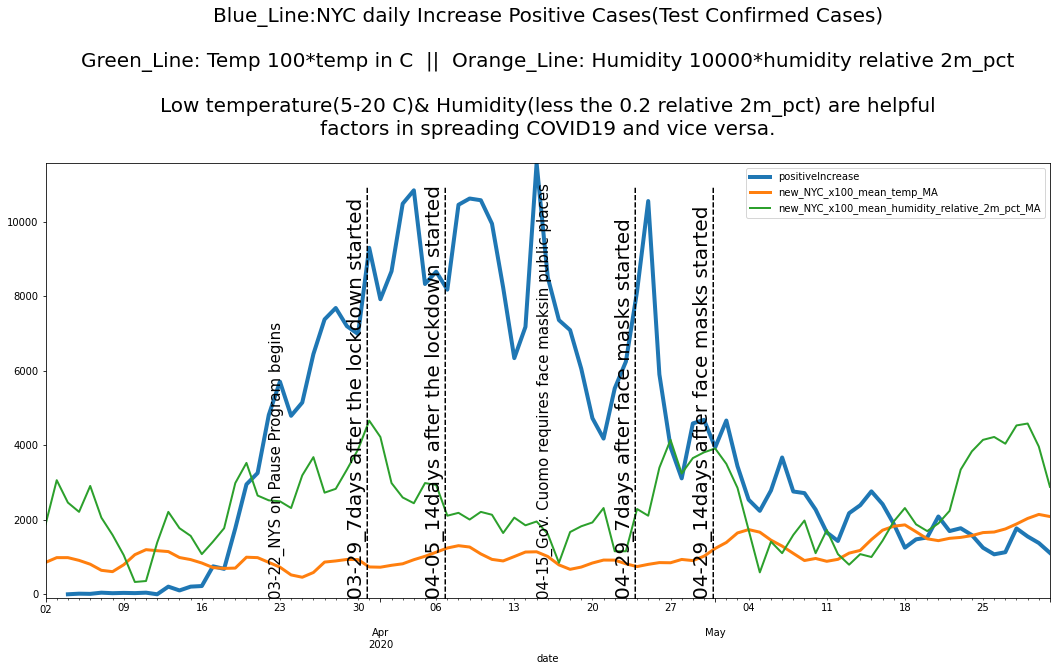

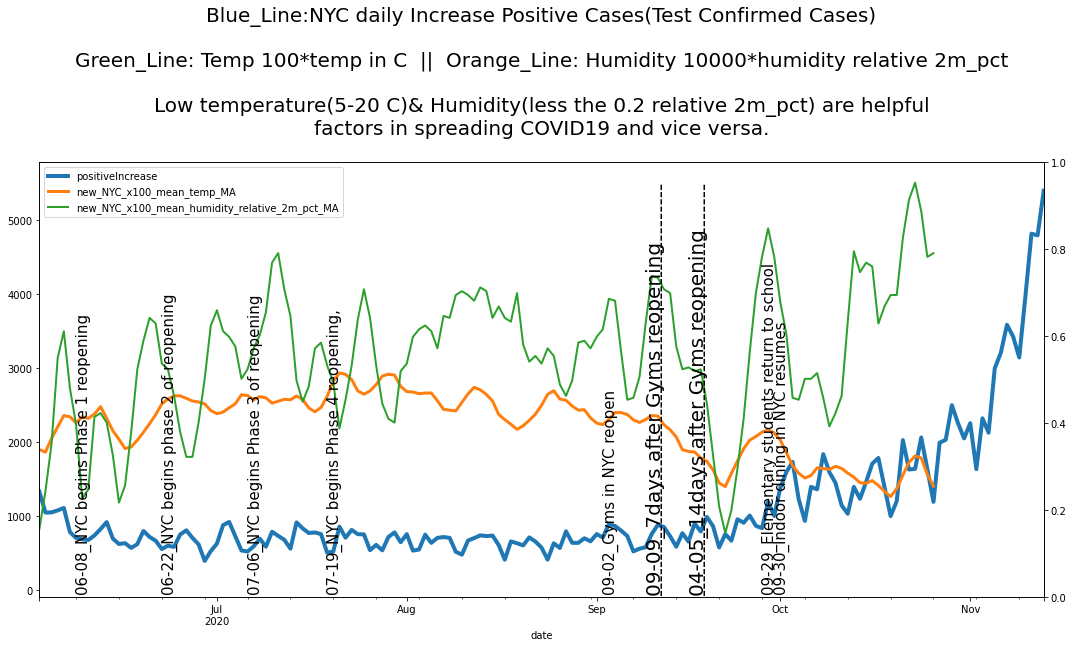

In [12]:
#@title
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
# print('Records Counts based on %s\n\n87%% of Data within High Quality Grade\n'%(df.groupby('dataQualityGrade').count()['date'].sort_values(ascending=False)))
# # cleandf = df.drop(df.index[(df['dataQualityGrade']=='F') | (df['dataQualityGrade']=='D') | (df['dataQualityGrade']==0)])
# # df2=cleandf[cleandf['state']=='NY']
print('''A Historical Timeline of COVID-19 in New York state can be found on: 
https://www.investopedia.com/historical-timeline-of-covid-19-in-new-york-city-5071986 \n\n''')

df1=df[df['state']=='NY']
ax = plt.gca()
plt.grid(True)
df1[df1['date']<'2020-06-01'].plot(x='date',y='positiveIncrease',figsize=(18,8),linewidth=4,ax=ax)
NYC_wdf[(NYC_wdf['date']<'2020-06-01')].plot(x='date',y='new_NYC_x100_mean_temp_MA',figsize=(18,8),linewidth=3,ax=ax)
NYC_wdf[(NYC_wdf['date']<'2020-06-01')].plot(x='date',y='new_NYC_x100_mean_humidity_relative_2m_pct_MA',figsize=(18,8),linewidth=2,ax=ax)
plt.title('''Blue_Line:NYC daily Increase Positive Cases(Test Confirmed Cases)\n
Green_Line: Temp 100*temp in C  ||  Orange_Line: Humidity 10000*humidity relative 2m_pct\n
Low temperature(5-20 C)& Humidity(less the 0.2 relative 2m_pct) are helpful\nfactors in spreading COVID19 and vice versa.\n''',fontsize=20)
plt.text('2020-03-22',0,'03-22_NYS on Pause Program begins',rotation='vertical',fontsize=15)
plt.text('2020-03-29',0,'03-29_7days after the lockdown started',rotation='vertical',fontsize=20)
plt.text('2020-03-30',0,'-------------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-04-05',0,'04-05_14days after the lockdown started',rotation='vertical',fontsize=20)
plt.text('2020-04-06',0,'-------------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-04-15',0,'04-15_Gov. Cuomo requires face masksin public places',rotation='vertical',fontsize=15)
plt.text('2020-04-22',0,'04-29_7days after face masks started',rotation='vertical',fontsize=20)
plt.text('2020-04-23',0,'-------------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-04-29',0,'04-29_14days after face masks started',rotation='vertical',fontsize=20)
plt.text('2020-04-30',0,'-------------------'*3,rotation='vertical',fontsize=20)
plt.ylim(-100,df1['positiveIncrease'].max())
plt.show()

ax = plt.gca()
df1[df1['date']>'2020-06-01'].plot(x='date',y='positiveIncrease',figsize=(18,8),linewidth=4,ax=ax)
NYC_wdf[(NYC_wdf['date']>'2020-06-01')].plot(x='date',y='new_NYC_x100_mean_temp_MA',figsize=(18,8),linewidth=3,ax=ax)
NYC_wdf[(NYC_wdf['date']>'2020-06-01')].plot(x='date',y='new_NYC_x100_mean_humidity_relative_2m_pct_MA',figsize=(18,8),linewidth=2,ax=ax)
plt.title('''Blue_Line:NYC daily Increase Positive Cases(Test Confirmed Cases)\n
Green_Line: Temp 100*temp in C  ||  Orange_Line: Humidity 10000*humidity relative 2m_pct\n
Low temperature(5-20 C)& Humidity(less the 0.2 relative 2m_pct) are helpful\nfactors in spreading COVID19 and vice versa.\n''',fontsize=20)
plt.text('2020-06-08',0,'06-08_NYC begins Phase 1 reopening',rotation='vertical',fontsize=15)
plt.text('2020-06-22',0,'06-22_NYC begins phase 2 of reopening',rotation='vertical',fontsize=15)
plt.text('2020-07-06',0,'07-06_NYC begins Phase 3 of reopening',rotation='vertical',fontsize=15)
plt.text('2020-07-19',0,'07-19_NYC begins Phase 4 reopening,',rotation='vertical',fontsize=15)
plt.text('2020-09-02',0,'09-02_Gyms in NYC reopen',rotation='vertical',fontsize=15)
plt.text('2020-09-09',0,'09-09_7days after Gyms reopening',rotation='vertical',fontsize=20)
plt.text('2020-09-10',0,'-------------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-09-16',0,'04-05_14days after Gyms reopening',rotation='vertical',fontsize=20)
plt.text('2020-09-17',0,'-------------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-09-28',0,'09-29_Elementary students return to school',rotation='vertical',fontsize=15)
plt.text('2020-09-30',0,'09-30_Indoor dining in NYC resumes',rotation='vertical',fontsize=15)
plt.ylim(-100,df1['positiveIncrease'].max()/2)
plt.twinx()
plt.show()

**California**

<IPython.core.display.Javascript object>

A Historical Timeline of COVID-19 in California state can be found on: 
https://calmatters.org/health/coronavirus/2020/04/gavin-newsom-coronavirus-updates-timeline/ 
https://apnews.com/article/ad28f59dbebc94cd80868cb5761a7702




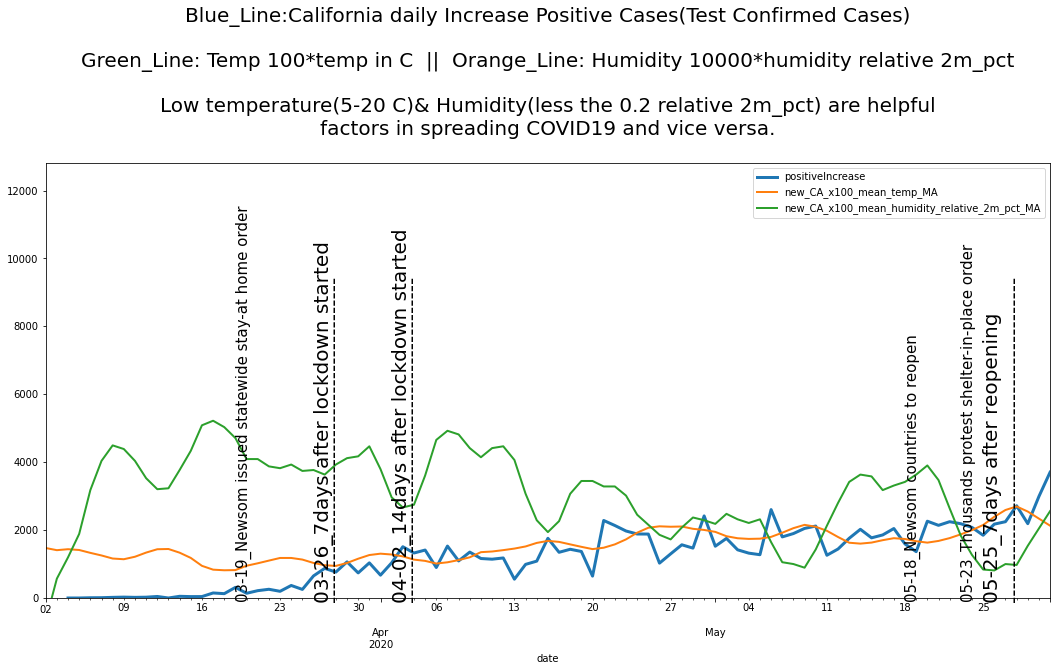

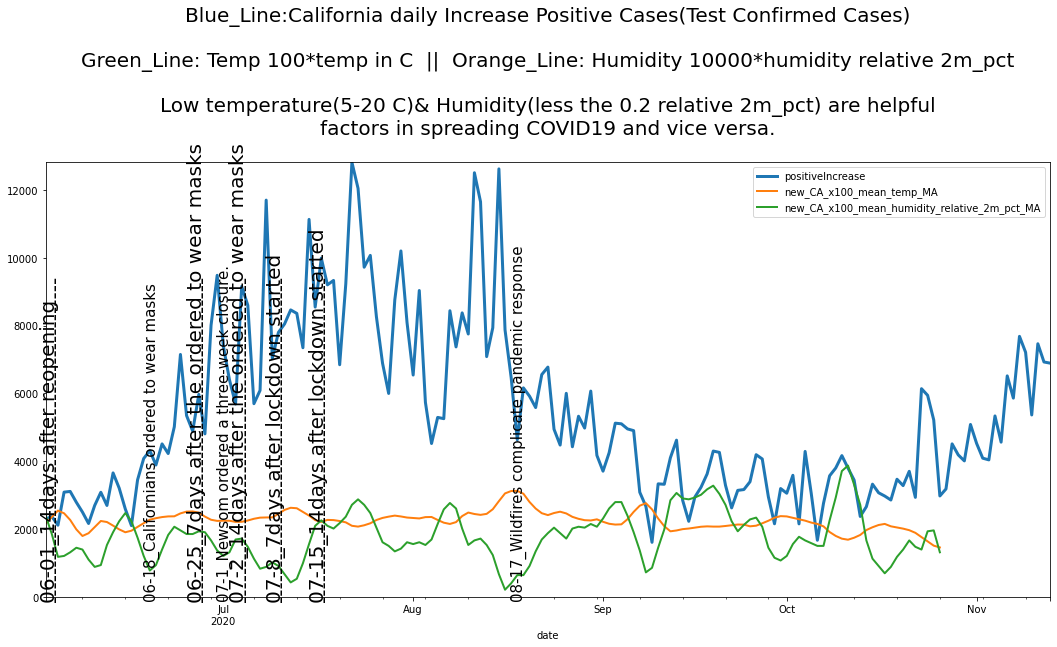

In [14]:
#@title
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
print('''A Historical Timeline of COVID-19 in California state can be found on: 
https://calmatters.org/health/coronavirus/2020/04/gavin-newsom-coronavirus-updates-timeline/ 
https://apnews.com/article/ad28f59dbebc94cd80868cb5761a7702\n\n''')

CA_df=df[df['state']=='CA']
ax = plt.gca()
CA_df[CA_df['date']<'2020-06-01'].plot(x='date',y='positiveIncrease',figsize=(18,8),linewidth=3,ax=ax)
CA_wdf[(CA_wdf['date']<'2020-06-01')].plot(x='date',y='new_CA_x100_mean_temp_MA',figsize=(18,8),linewidth=2,ax=ax)
CA_wdf[(CA_wdf['date']<'2020-06-01')].plot(x='date',y='new_CA_x100_mean_humidity_relative_2m_pct_MA',figsize=(18,8),linewidth=2,ax=ax)
plt.title('''Blue_Line:California daily Increase Positive Cases(Test Confirmed Cases)\n
Green_Line: Temp 100*temp in C  ||  Orange_Line: Humidity 10000*humidity relative 2m_pct\n
Low temperature(5-20 C)& Humidity(less the 0.2 relative 2m_pct) are helpful\nfactors in spreading COVID19 and vice versa.\n''',fontsize=20)
plt.text('2020-03-19',0,'03-19_Newsom issued statewide stay-at home order',rotation='vertical',fontsize=15)
plt.text('2020-03-26',0,'03-26_7days after lockdown started',rotation='vertical',fontsize=20)
plt.text('2020-03-27',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-04-02',0,'04-02_14days after lockdown started',rotation='vertical',fontsize=20)
plt.text('2020-04-03',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-05-18',0,'05-18_Newsom countries to reopen',rotation='vertical',fontsize=15)
plt.text('2020-05-23',0,'05-23_Thousands protest shelter-in-place order',rotation='vertical',fontsize=15)
plt.text('2020-05-25',0,'05-25_7days after reopening',rotation='vertical',fontsize=20)
plt.text('2020-05-27',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.ylim(0,CA_df['positiveIncrease'].max())
plt.show()

ax = plt.gca()
CA_df[CA_df['date']>'2020-06-01'].plot(x='date',y='positiveIncrease',figsize=(18,8),linewidth=3,ax=ax)
CA_wdf[(CA_wdf['date']>'2020-06-01')].plot(x='date',y='new_CA_x100_mean_temp_MA',figsize=(18,8),linewidth=2,ax=ax)
CA_wdf[(CA_wdf['date']>'2020-06-01')].plot(x='date',y='new_CA_x100_mean_humidity_relative_2m_pct_MA',figsize=(18,8),linewidth=2,ax=ax)
plt.title('''Blue_Line:California daily Increase Positive Cases(Test Confirmed Cases)\n
Green_Line: Temp 100*temp in C  ||  Orange_Line: Humidity 10000*humidity relative 2m_pct\n
Low temperature(5-20 C)& Humidity(less the 0.2 relative 2m_pct) are helpful\nfactors in spreading COVID19 and vice versa.\n''',fontsize=20)
plt.text('2020-06-01',0,'06-01_14days after reopening',rotation='vertical',fontsize=20)
plt.text('2020-06-02',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-06-18',0,'06-18_Californians ordered to wear masks',rotation='vertical',fontsize=15)
plt.text('2020-06-25',0,'06-25_7days after the ordered to wear masks',rotation='vertical',fontsize=20)
plt.text('2020-06-26',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-07-2',0,'07-2_14days after the ordered to wear masks',rotation='vertical',fontsize=20)
plt.text('2020-07-3',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-06-30',0,'07-1_Newsom ordered a three-week closure.',rotation='vertical',fontsize=15)
plt.text('2020-07-8',0,'07-8_7days after lockdown started',rotation='vertical',fontsize=20)
plt.text('2020-07-9',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-07-15',0,'07-15_14days after lockdown started',rotation='vertical',fontsize=20)
plt.text('2020-07-16',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-08-17',0,'08-17_Wildfires complicate pandemic response',rotation='vertical',fontsize=15)
plt.ylim(0,CA_df['positiveIncrease'].max())
plt.show()

**Texas**

<IPython.core.display.Javascript object>

A Historical Timeline of COVID-19 in Texas state can be found on: 
https://www.reformaustin.org/coronavirus/coronavirus-in-texas-timeline/ 
https://abc13.com/covid-19-texas-timeline-all-coronavirus-events-in-government-response-state-restrictions/6345759/
https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Texas#July




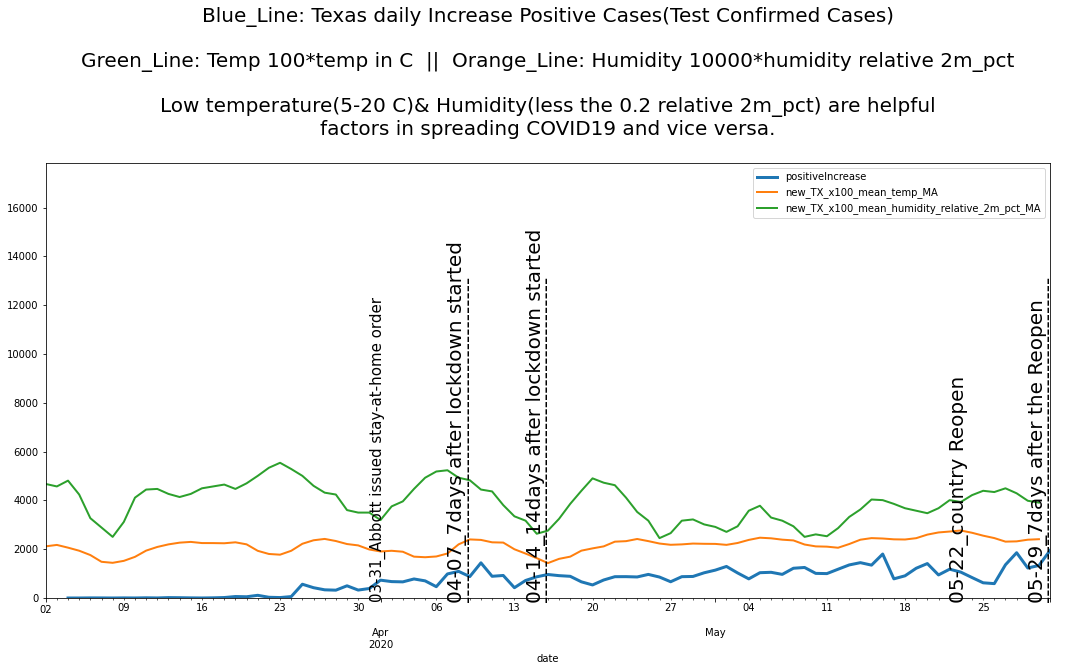

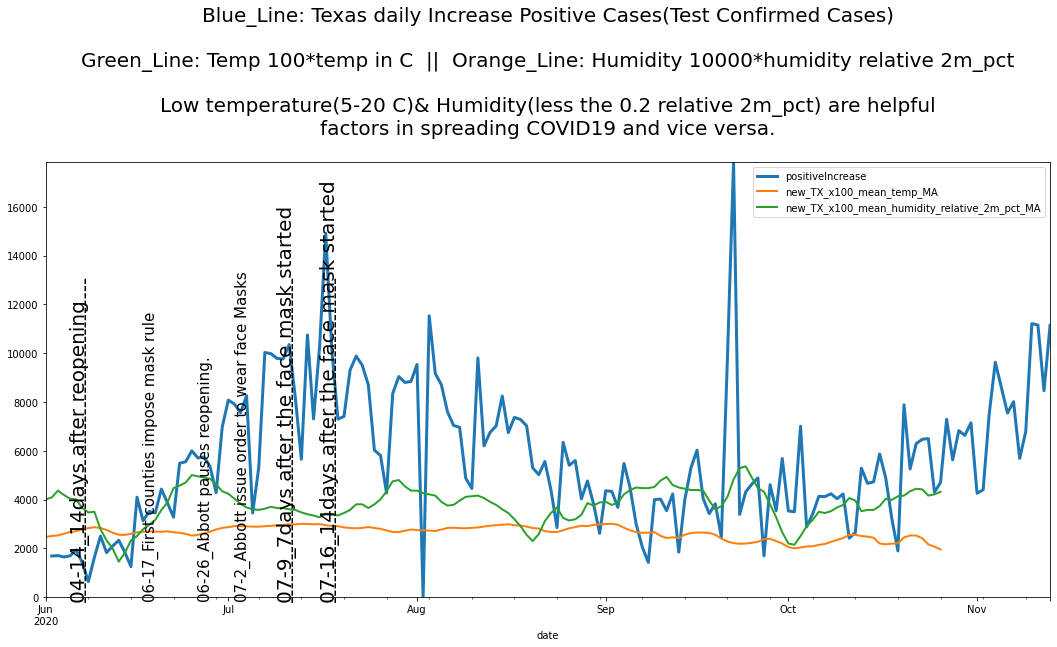

In [15]:
#@title
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
print('''A Historical Timeline of COVID-19 in Texas state can be found on: 
https://www.reformaustin.org/coronavirus/coronavirus-in-texas-timeline/ 
https://abc13.com/covid-19-texas-timeline-all-coronavirus-events-in-government-response-state-restrictions/6345759/
https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Texas#July\n\n''')

TX_df=df[df['state']=='TX']
ax = plt.gca()
TX_df[TX_df['date']<'2020-06-01'].plot(x='date',y='positiveIncrease',figsize=(18,8),linewidth=3,ax=ax)
TX_wdf[(TX_wdf['date']<'2020-05-31')].plot(x='date',y='new_TX_x100_mean_temp_MA',figsize=(18,8),linewidth=2,ax=ax)
TX_wdf[(TX_wdf['date']<'2020-05-31')].plot(x='date',y='new_TX_x100_mean_humidity_relative_2m_pct_MA',figsize=(18,8),linewidth=2,ax=ax)
plt.title('''Blue_Line: Texas daily Increase Positive Cases(Test Confirmed Cases)\n
Green_Line: Temp 100*temp in C  ||  Orange_Line: Humidity 10000*humidity relative 2m_pct\n
Low temperature(5-20 C)& Humidity(less the 0.2 relative 2m_pct) are helpful\nfactors in spreading COVID19 and vice versa.\n''',fontsize=20)
plt.text('2020-03-31',0,'03-31_Abbott issued stay-at-home order',rotation='vertical',fontsize=15)
plt.text('2020-04-07',0,'04-07_7days after lockdown started',rotation='vertical',fontsize=20)
plt.text('2020-04-08',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-04-14',0,'04-14_14days after lockdown started',rotation='vertical',fontsize=20)
plt.text('2020-04-15',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-05-22',0,'05-22_country Reopen',rotation='vertical',fontsize=20)
plt.text('2020-05-29',0,'05-29_7days after the Reopen',rotation='vertical',fontsize=20)
plt.text('2020-05-30',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.ylim(0,TX_df['positiveIncrease'].max())
plt.show()
ax = plt.gca()
TX_df[TX_df['date']>'2020-06-01'].plot(x='date',y='positiveIncrease',figsize=(18,8),linewidth=3,ax=ax)
TX_wdf[(TX_wdf['date']>'2020-05-31')].plot(x='date',y='new_TX_x100_mean_temp_MA',figsize=(18,8),linewidth=2,ax=ax)
TX_wdf[(TX_wdf['date']>'2020-05-31')].plot(x='date',y='new_TX_x100_mean_humidity_relative_2m_pct_MA',figsize=(18,8),linewidth=2,ax=ax)
plt.title('''Blue_Line: Texas daily Increase Positive Cases(Test Confirmed Cases)\n
Green_Line: Temp 100*temp in C  ||  Orange_Line: Humidity 10000*humidity relative 2m_pct\n
Low temperature(5-20 C)& Humidity(less the 0.2 relative 2m_pct) are helpful\nfactors in spreading COVID19 and vice versa.\n''',fontsize=20)
plt.text('2020-06-05',0,'04-14_14days after reopening',rotation='vertical',fontsize=20)
plt.text('2020-06-06',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-06-17',0,'06-17_First counties impose mask rule',rotation='vertical',fontsize=15)
plt.text('2020-06-26',0,'06-26_Abbott pauses reopening.',rotation='vertical',fontsize=15)
plt.text('2020-07-2',0,'07-2_Abbott issue order to wear face Masks',rotation='vertical',fontsize=15)
plt.text('2020-07-9',0,'07-9_7days after the face mask started',rotation='vertical',fontsize=20)
plt.text('2020-07-10',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-07-16',0,'07-16_14days after the face mask started',rotation='vertical',fontsize=20)
plt.text('2020-07-17',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.ylim(0,TX_df['positiveIncrease'].max())
plt.show()

**Florida**

<IPython.core.display.Javascript object>

A Historical Timeline of COVID-19 in Florida state can be found on: 
https://www.clickorlando.com/news/local/2020/03/20/timeline-the-spread-of-coronavirus-in-florida/



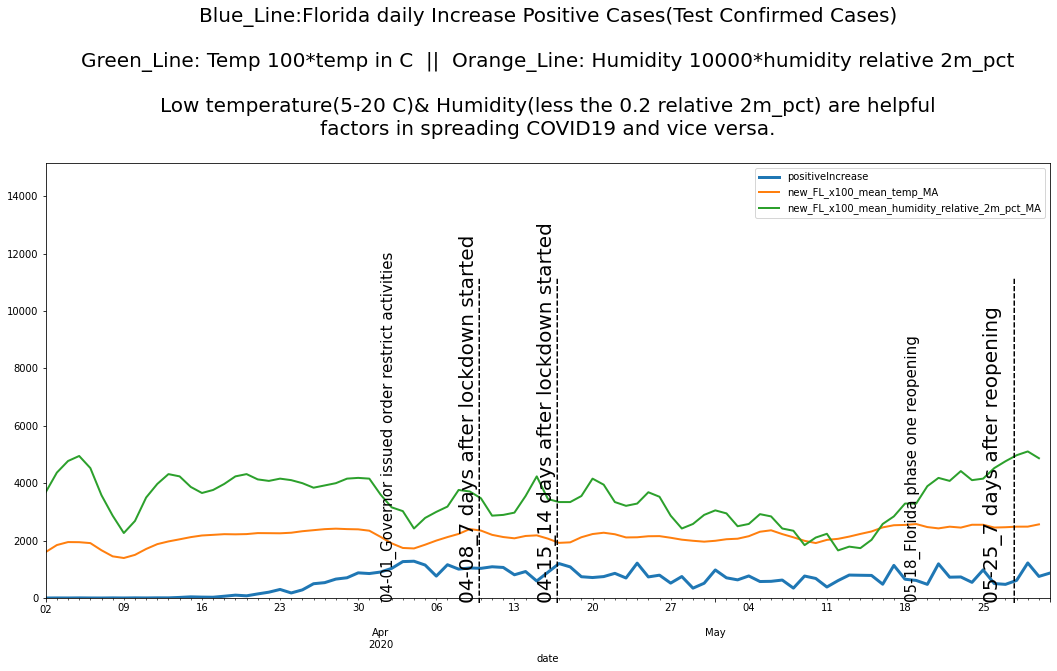

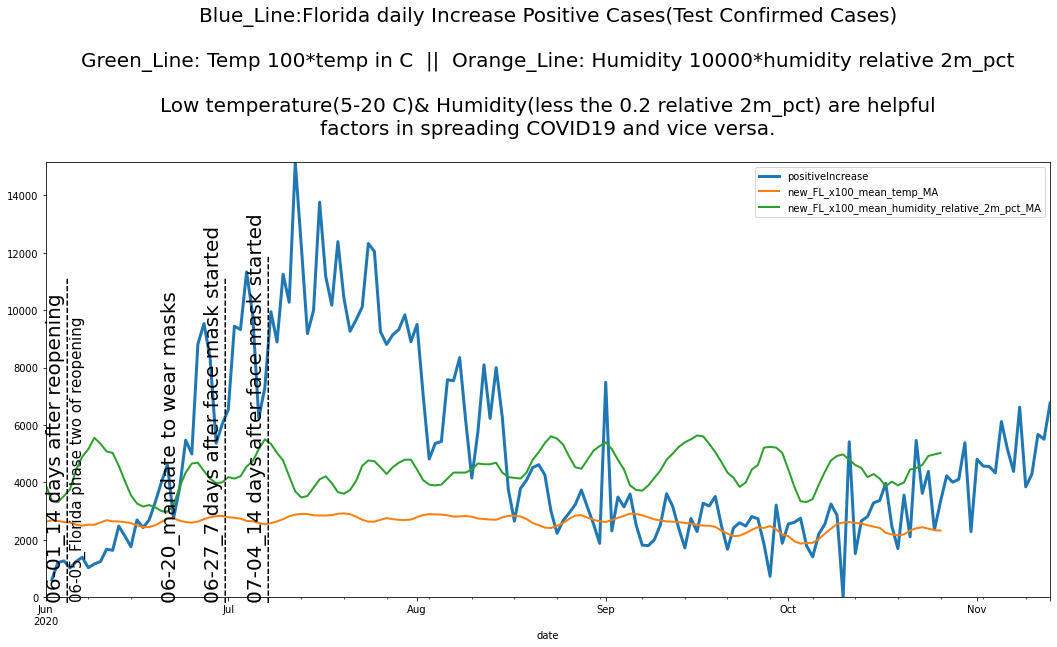

In [16]:
#@title
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
print('''A Historical Timeline of COVID-19 in Florida state can be found on: 
https://www.clickorlando.com/news/local/2020/03/20/timeline-the-spread-of-coronavirus-in-florida/\n''')

FL_df=df[df['state']=='FL']
ax = plt.gca()
FL_df[(FL_df['date']<'2020-06-01')  & (FL_df['date']>'2020-03-01')].plot(x='date',y='positiveIncrease',figsize=(18,8),linewidth=3,ax=ax)
FL_wdf[(FL_wdf['date']<'2020-05-31')].plot(x='date',y='new_FL_x100_mean_temp_MA',figsize=(18,8),linewidth=2,ax=ax)
FL_wdf[(FL_wdf['date']<'2020-05-31')].plot(x='date',y='new_FL_x100_mean_humidity_relative_2m_pct_MA',figsize=(18,8),linewidth=2,ax=ax)
plt.title('''Blue_Line:Florida daily Increase Positive Cases(Test Confirmed Cases)\n
Green_Line: Temp 100*temp in C  ||  Orange_Line: Humidity 10000*humidity relative 2m_pct\n
Low temperature(5-20 C)& Humidity(less the 0.2 relative 2m_pct) are helpful\nfactors in spreading COVID19 and vice versa.\n''',fontsize=20)
plt.text('2020-04-01',0,'04-01_Governor issued order restrict activities',rotation='vertical',fontsize=15)
plt.text('2020-04-08',0,'04-08_7 days after lockdown started',rotation='vertical',fontsize=20)
plt.text('2020-04-09',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-04-15',0,'04-15_14 days after lockdown started',rotation='vertical',fontsize=20)
plt.text('2020-04-16',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-05-18',0,'05-18_Florida phase one reopening',rotation='vertical',fontsize=15)
plt.text('2020-05-25',0,'05-25_7 days after reopening',rotation='vertical',fontsize=20)
plt.text('2020-05-27',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.ylim(0,FL_df['positiveIncrease'].max())
plt.show()
ax = plt.gca()
FL_df[FL_df['date']>'2020-06-01'].plot(x='date',y='positiveIncrease',figsize=(18,8),linewidth=3,ax=ax)
FL_wdf[(FL_wdf['date']>'2020-05-31')].plot(x='date',y='new_FL_x100_mean_temp_MA',figsize=(18,8),linewidth=2,ax=ax)
FL_wdf[(FL_wdf['date']>'2020-05-31')].plot(x='date',y='new_FL_x100_mean_humidity_relative_2m_pct_MA',figsize=(18,8),linewidth=2,ax=ax)
plt.title('''Blue_Line:Florida daily Increase Positive Cases(Test Confirmed Cases)\n
Green_Line: Temp 100*temp in C  ||  Orange_Line: Humidity 10000*humidity relative 2m_pct\n
Low temperature(5-20 C)& Humidity(less the 0.2 relative 2m_pct) are helpful\nfactors in spreading COVID19 and vice versa.\n''',fontsize=20)
plt.text('2020-06-01',0,'06-01_14 days after reopening',rotation='vertical',fontsize=20)
plt.text('2020-06-03',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-06-05',0,'06-05_Florida phase two of reopening',rotation='vertical',fontsize=15)
plt.text('2020-06-20',0,'06-20_mandate to wear masks ',rotation='vertical',fontsize=20)
plt.text('2020-06-27',0,'06-27_7 days after face mask started',rotation='vertical',fontsize=20)
plt.text('2020-06-29',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-07-04',0,'07-04_14 days after face mask started',rotation='vertical',fontsize=20)
plt.text('2020-07-06',0,'----------------'*3,rotation='vertical',fontsize=20)
plt.ylim(0,FL_df['positiveIncrease'].max())
plt.show()

**Illinois**

<IPython.core.display.Javascript object>

A Historical Timeline of COVID-19 in Illinois state can be found on: 



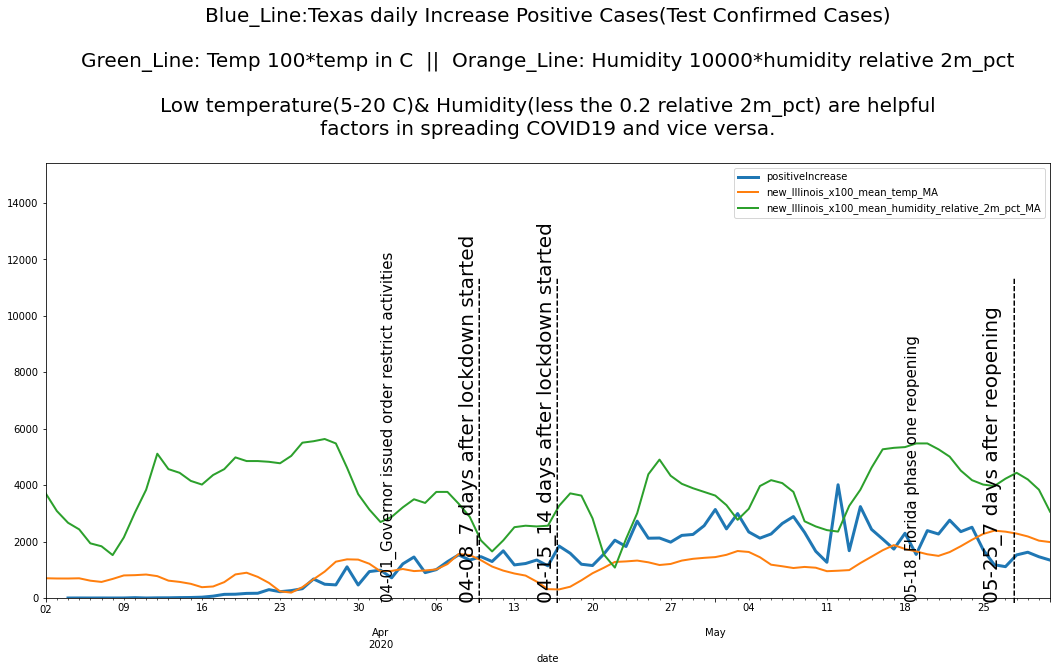

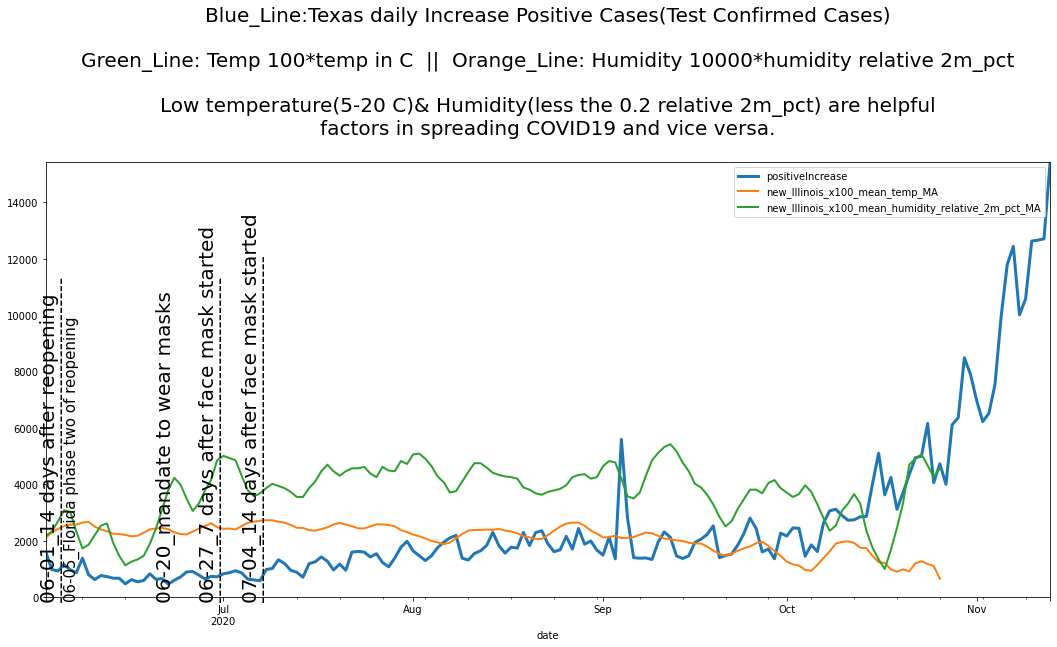

In [17]:
#@title
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
print('''A Historical Timeline of COVID-19 in Illinois state can be found on: 
''')

IL_df=df[df['state']=='IL']
ax = plt.gca()
IL_df[(IL_df['date']<'2020-06-01') & (IL_df['date']>'2020-03-01')].plot(x='date',y='positiveIncrease',figsize=(18,8),linewidth=3,ax=ax)
Illinois_wdf[(Illinois_wdf['date']<'2020-06-01')].plot(x='date',y='new_Illinois_x100_mean_temp_MA',figsize=(18,8),linewidth=2,ax=ax)
Illinois_wdf[(Illinois_wdf['date']<'2020-06-01')].plot(x='date',y='new_Illinois_x100_mean_humidity_relative_2m_pct_MA',figsize=(18,8),linewidth=2,ax=ax)
plt.title('''Blue_Line:Texas daily Increase Positive Cases(Test Confirmed Cases)\n
Green_Line: Temp 100*temp in C  ||  Orange_Line: Humidity 10000*humidity relative 2m_pct\n
Low temperature(5-20 C)& Humidity(less the 0.2 relative 2m_pct) are helpful\nfactors in spreading COVID19 and vice versa.\n''',fontsize=20)
plt.text('2020-04-01',0,'04-01_Governor issued order restrict activities',rotation='vertical',fontsize=15)
plt.text('2020-04-08',0,'04-08_7 days after lockdown started',rotation='vertical',fontsize=20)
plt.text('2020-04-09',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-04-15',0,'04-15_14 days after lockdown started',rotation='vertical',fontsize=20)
plt.text('2020-04-16',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-05-18',0,'05-18_Florida phase one reopening',rotation='vertical',fontsize=15)
plt.text('2020-05-25',0,'05-25_7 days after reopening',rotation='vertical',fontsize=20)
plt.text('2020-05-27',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.ylim(0,IL_df['positiveIncrease'].max())
plt.show()
ax = plt.gca()
IL_df[IL_df['date']>'2020-06-01'].plot(x='date',y='positiveIncrease',figsize=(18,8),linewidth=3,ax=ax)
Illinois_wdf[(Illinois_wdf['date']>'2020-06-01')].plot(x='date',y='new_Illinois_x100_mean_temp_MA',figsize=(18,8),linewidth=2,ax=ax)
Illinois_wdf[(Illinois_wdf['date']>'2020-06-01')].plot(x='date',y='new_Illinois_x100_mean_humidity_relative_2m_pct_MA',figsize=(18,8),linewidth=2,ax=ax)
plt.title('''Blue_Line:Texas daily Increase Positive Cases(Test Confirmed Cases)\n
Green_Line: Temp 100*temp in C  ||  Orange_Line: Humidity 10000*humidity relative 2m_pct\n
Low temperature(5-20 C)& Humidity(less the 0.2 relative 2m_pct) are helpful\nfactors in spreading COVID19 and vice versa.\n''',fontsize=20)
plt.text('2020-06-01',0,'06-01_14 days after reopening',rotation='vertical',fontsize=20)
plt.text('2020-06-03',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-06-05',0,'06-05_Florida phase two of reopening',rotation='vertical',fontsize=15)
plt.text('2020-06-20',0,'06-20_mandate to wear masks ',rotation='vertical',fontsize=20)
plt.text('2020-06-27',0,'06-27_7 days after face mask started',rotation='vertical',fontsize=20)
plt.text('2020-06-29',0,'---------------'*3,rotation='vertical',fontsize=20)
plt.text('2020-07-04',0,'07-04_14 days after face mask started',rotation='vertical',fontsize=20)
plt.text('2020-07-06',0,'----------------'*3,rotation='vertical',fontsize=20)
plt.ylim(0,IL_df['positiveIncrease'].max())
plt.show()

In [ ]:
#@title
